# MadMiner particle physics tutorial

# Part 2b: Analyzing events at Delphes level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this with Delphes, in the alternative part 2a we stick to parton level.

## 0. Preparations

Before you execute this notebook, make sure you have working installations of MadGraph, Pythia, and Delphes.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle
from madminer.plotting import plot_distributions


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Please enter here the path to your MG5 root directory. This notebook assumes that you installed Delphes and Pythia through MG5.

## 5. Plot distributions

Let's see what our MC run produced:

18:06 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:06 madminer.analysis    INFO    Found 1 parameters
18:06 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:06 madminer.analysis    INFO    Did not find nuisance parameters
18:06 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:06 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:06 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:06 madminer.analysis    DEBUG      sm: kapz = 1.00
18:06 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:06 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:06 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:06 madminer.analysis    INFO    Found 35 observables
18:06 madminer.analysis    DEBUG      0 delta_phi_jj
18:06 madminer.analysis    DEBUG      1 delta_eta_jj
18:06 madminer.analysis    DEBUG      2 invmass_jj
18:06 madminer.analysis    DEBUG      3 m4l
18

18:06 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.3961946878503717, -2.4243286727980644, -2.433821564506807, -2.398774807124144, -2.331867311034162], max = [2.4015746636307806, 2.419393189205588, 2.426432004082159, 2.4023595666739426, 2.3527104856592427]
18:06 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:07 madminer.plotting    DEBUG   Ranges for observable phi_l1: min = [-3.141589403152466, -3.141589403152466, -3.141589403152466, -3.141589403152466, -3.141589403152466], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:07 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
18:07 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991], max = [728.2260920066228, 680.1123993144579, 672.3407214063081, 726.2732924372319, 802.2424020301421]
18:07 madm

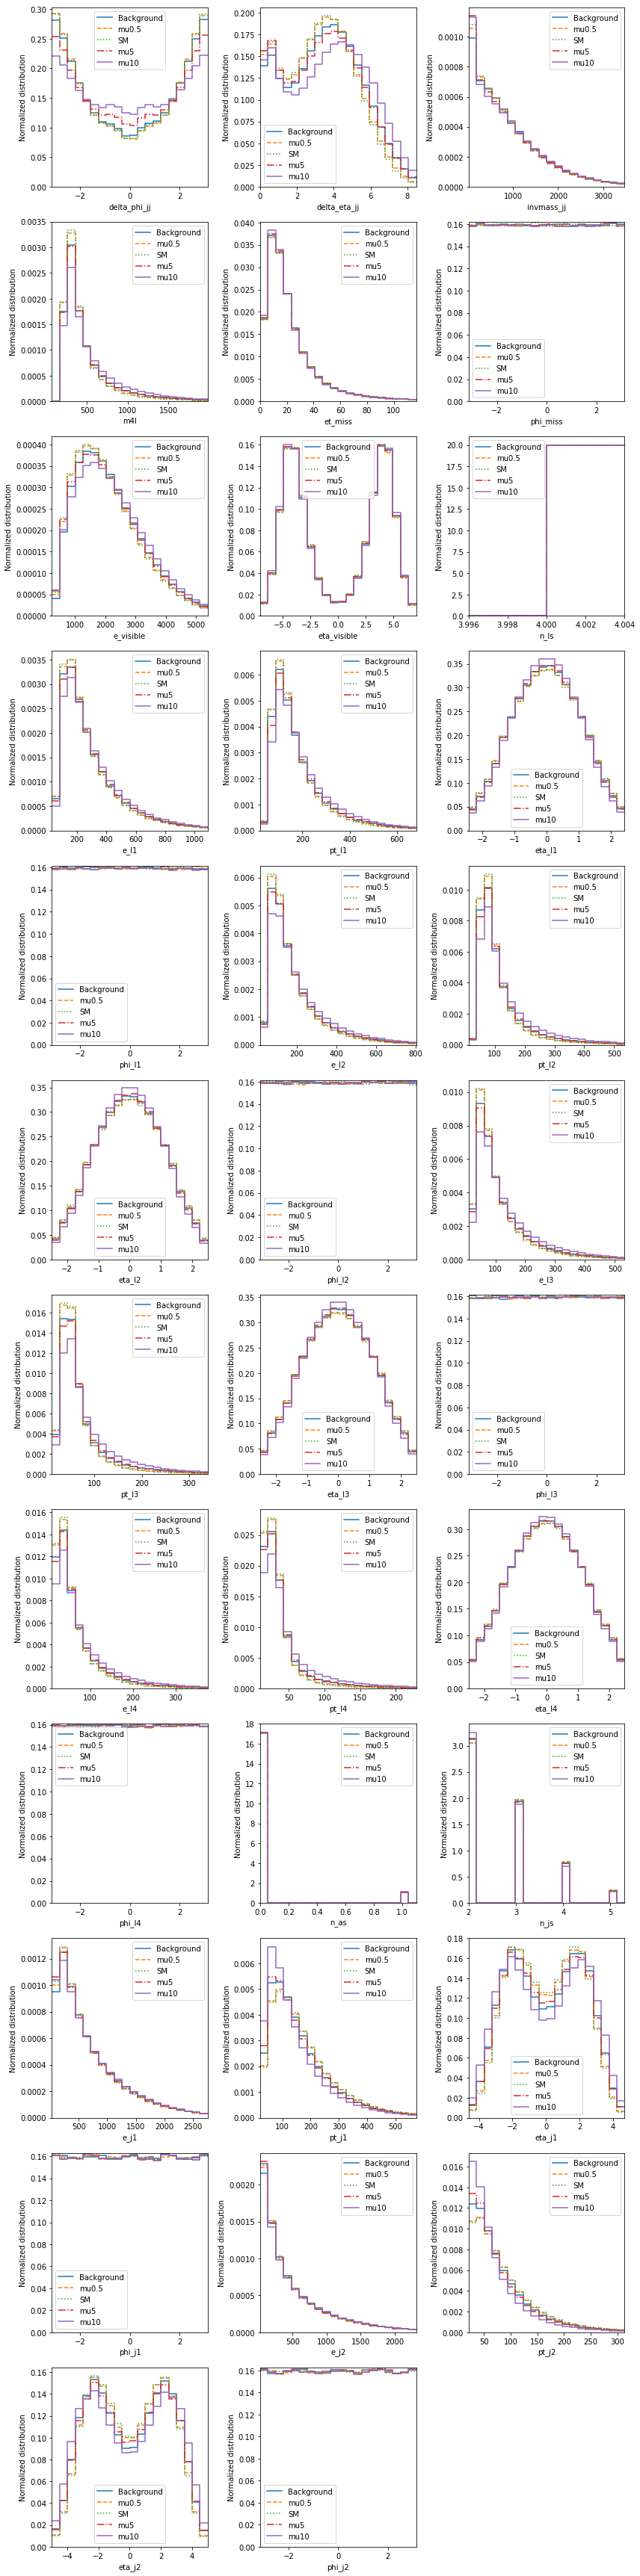

In [3]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

18:07 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:07 madminer.analysis    INFO    Found 1 parameters
18:07 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:07 madminer.analysis    INFO    Did not find nuisance parameters
18:07 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:07 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:07 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:07 madminer.analysis    DEBUG      sm: kapz = 1.00
18:07 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:07 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:07 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:07 madminer.analysis    INFO    Found 35 observables
18:07 madminer.analysis    DEBUG      0 delta_phi_jj
18:07 madminer.analysis    DEBUG      1 delta_eta_jj
18:07 madminer.analysis    DEBUG      2 invmass_jj
18:07 madminer.analysis    DEBUG      3 m4l
18

18:07 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:07 madminer.plotting    DEBUG   Ranges for observable phi_l1: min = [-3.141589403152466, -3.141589403152466, -3.141589403152466, -3.141589403152466, -3.141589403152466], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:07 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
18:07 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991], max = [710.8078816931715, 673.0594360920225, 669.6680725628513, 729.5741858690085, 781.7449996318708]
18:07 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
18:07 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.23784637451172, 12.23784637451172, 12.550659220870028, 12.23784637451172, 12.23784637451172], max = [440.8120575693257, 403.39596770738

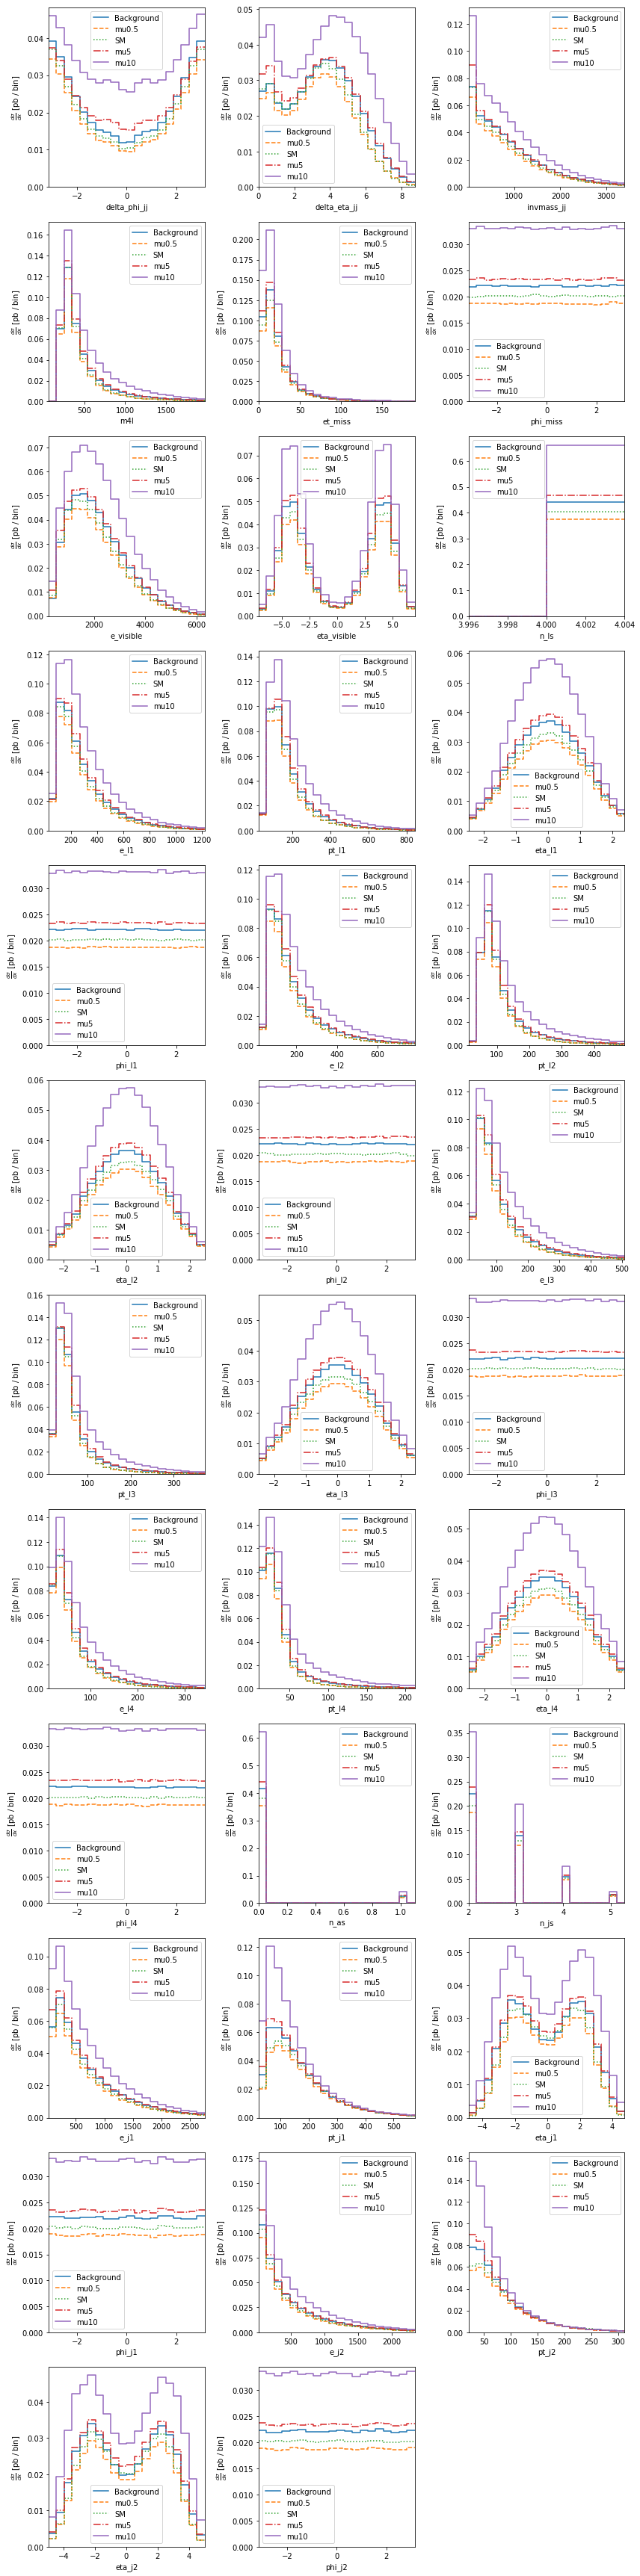

In [4]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)

# Find mu that looks same as mu=0

18:27 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:27 madminer.analysis    INFO    Found 1 parameters
18:27 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:27 madminer.analysis    INFO    Did not find nuisance parameters
18:27 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:27 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:27 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:27 madminer.analysis    DEBUG      sm: kapz = 1.00
18:27 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:27 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:27 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:27 madminer.analysis    INFO    Found 35 observables
18:27 madminer.analysis    DEBUG      0 delta_phi_jj
18:27 madminer.analysis    DEBUG      1 delta_eta_jj
18:27 madminer.analysis    DEBUG      2 invmass_jj
18:27 madminer.analysis    DEBUG      3 m4l
18

18:28 madminer.plotting    DEBUG   Plotting panel 10: observable 10, label pt_l1
18:28 madminer.plotting    DEBUG   Ranges for observable pt_l1: min = [22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438], max = [686.9558292227977, 603.1901880651014, 606.2864776249623, 666.6504636457278, 761.0970174676476, 832.2774571087788, 833.4168481686028]
18:28 madminer.plotting    DEBUG   Plotting panel 11: observable 11, label eta_l1
18:28 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.3963935685402924, -2.4153435667296543, -2.4155489630812848, -2.4073908182128254, -2.3967513114522894, -2.3631170668034134, -2.3168648911396037], max = [2.384780629137472, 2.415397380999808, 2.4161824502192686, 2.4060991478459384, 2.3877448619049657, 2.3610130499377555, 2.298256459143085]
18:28 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:28 madminer.plotting    DEBUG   Ranges for 

18:28 madminer.plotting    DEBUG   Plotting panel 30: observable 30, label phi_j1
18:28 madminer.plotting    DEBUG   Ranges for observable phi_j1: min = [-3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:28 madminer.plotting    DEBUG   Plotting panel 31: observable 31, label e_j2
18:28 madminer.plotting    DEBUG   Ranges for observable e_j2: min = [23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802], max = [2344.056917525919, 2333.833301474826, 2330.7284559204886, 2319.877493736015, 2313.2197499915846, 2288.16504789877, 2273.9147487495684]
18:28 madminer.plotting    DEBUG   Plotting panel 32: observable 32, label pt_j2
18:28 madminer.plotting    DEBUG   Ranges for obser

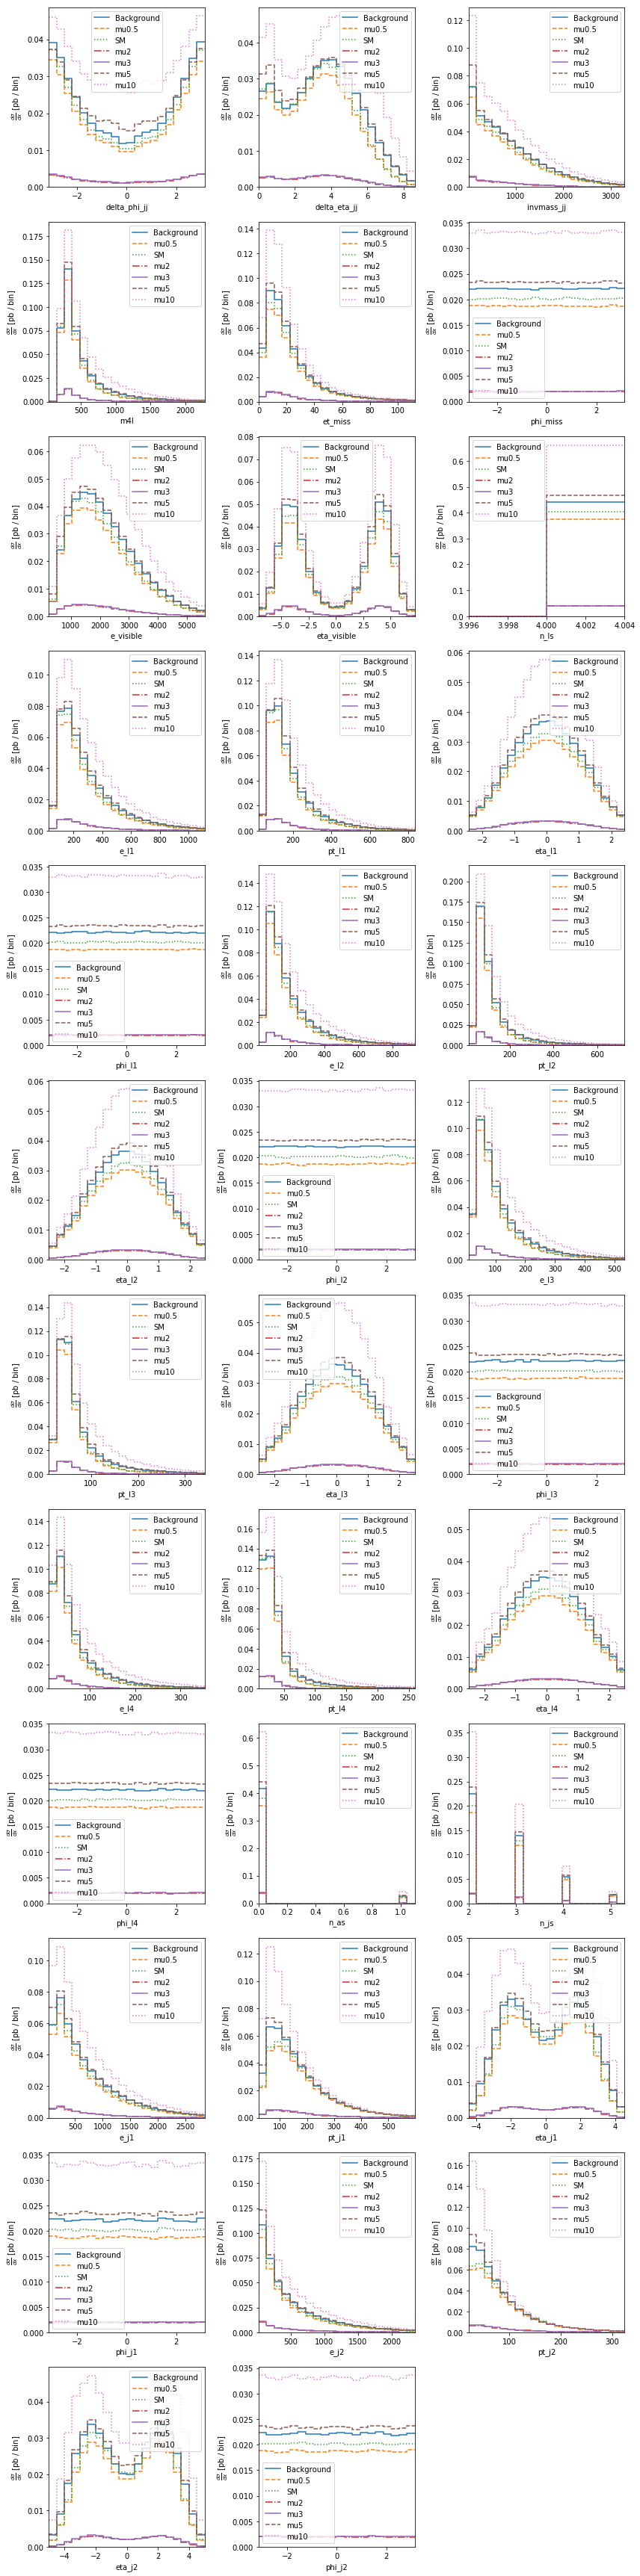

In [16]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [2.**0.25], [3.**0.25], [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu2', 'mu3', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)

18:28 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:28 madminer.analysis    INFO    Found 1 parameters
18:28 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:28 madminer.analysis    INFO    Did not find nuisance parameters
18:28 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:28 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:28 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:28 madminer.analysis    DEBUG      sm: kapz = 1.00
18:28 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:28 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:28 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:28 madminer.analysis    INFO    Found 35 observables
18:28 madminer.analysis    DEBUG      0 delta_phi_jj
18:28 madminer.analysis    DEBUG      1 delta_eta_jj
18:28 madminer.analysis    DEBUG      2 invmass_jj
18:28 madminer.analysis    DEBUG      3 m4l
18

18:29 madminer.plotting    DEBUG   Plotting panel 10: observable 10, label pt_l1
18:29 madminer.plotting    DEBUG   Ranges for observable pt_l1: min = [22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438], max = [646.2775992119952, 607.5562870018168, 603.0916016156323, 605.2129672300684, 612.5862272417737, 642.088566464779, 670.4504518098485]
18:29 madminer.plotting    DEBUG   Plotting panel 11: observable 11, label eta_l1
18:29 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.3958112778826433, -2.428939226128739, -2.4354767523708434, -2.4352010610514085, -2.426201530419755, -2.413281450607534, -2.3715818410071527], max = [2.4321648510866694, 2.4548159453427054, 2.4554856425831697, 2.4523144567606625, 2.436930077454776, 2.4045245887304567, 2.3294712770208417]
18:29 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:29 madminer.plotting    DEBUG   Ranges for ob

18:29 madminer.plotting    DEBUG   Plotting panel 30: observable 30, label phi_j1
18:29 madminer.plotting    DEBUG   Ranges for observable phi_j1: min = [-3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:29 madminer.plotting    DEBUG   Plotting panel 31: observable 31, label e_j2
18:29 madminer.plotting    DEBUG   Ranges for observable e_j2: min = [23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802], max = [2263.7202716722613, 2276.9239839750667, 2275.5882080715674, 2266.435011839699, 2258.2103729189134, 2238.720710118404, 2222.3361423515553]
18:29 madminer.plotting    DEBUG   Plotting panel 32: observable 32, label pt_j2
18:29 madminer.plotting    DEBUG   Ranges for ob

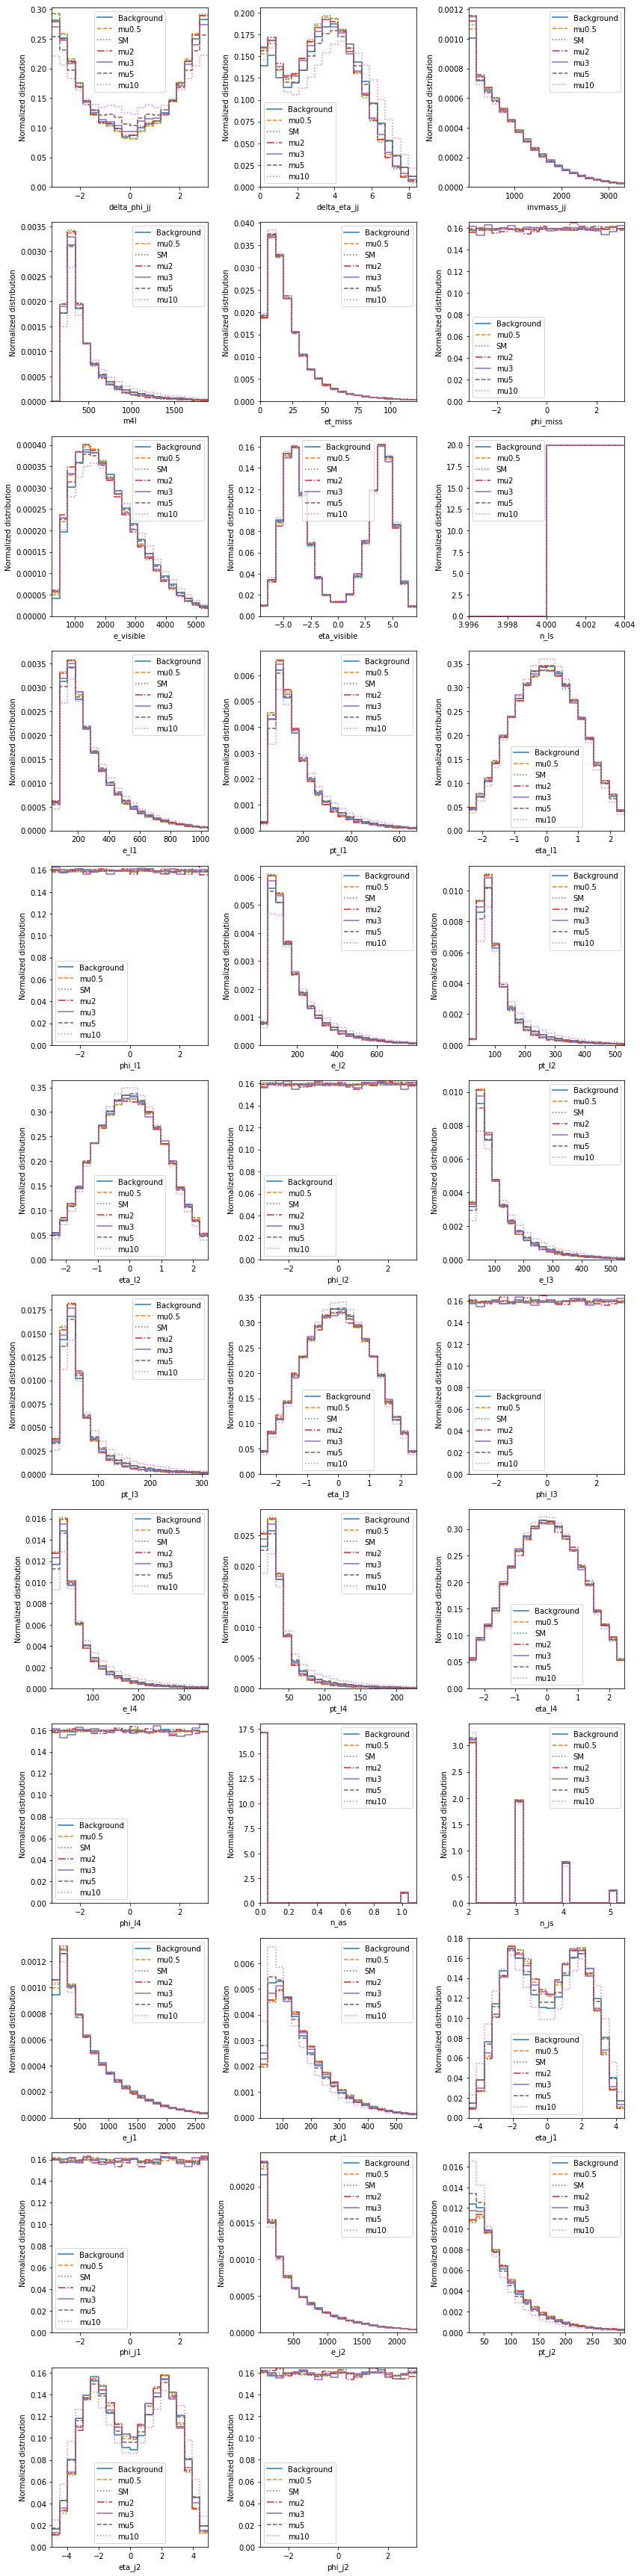

In [17]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [2.**0.25], [3.**0.25], [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu2', 'mu3', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

In [12]:
parameter_points

array([[0.        ],
       [1.        ],
       [1.18920712]])

In [13]:
2**0.25

1.189207115002721

18:18 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:18 madminer.analysis    INFO    Found 1 parameters
18:18 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:18 madminer.analysis    INFO    Did not find nuisance parameters
18:18 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:18 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:18 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:18 madminer.analysis    DEBUG      sm: kapz = 1.00
18:18 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:18 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:18 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:18 madminer.analysis    INFO    Found 35 observables
18:18 madminer.analysis    DEBUG      0 delta_phi_jj
18:18 madminer.analysis    DEBUG      1 delta_eta_jj
18:18 madminer.analysis    DEBUG      2 invmass_jj
18:18 madminer.analysis    DEBUG      3 m4l
18

18:18 madminer.plotting    DEBUG   Plotting panel 16: observable 16, label phi_l2
18:18 madminer.plotting    DEBUG   Ranges for observable phi_l2: min = [-3.141592025756836, -3.141592025756836, -3.141592025756836], max = [3.141592502593994, 3.141592502593994, 3.141592502593994]
18:18 madminer.plotting    DEBUG   Plotting panel 17: observable 17, label e_l3
18:18 madminer.plotting    DEBUG   Ranges for observable e_l3: min = [10.417520319704682, 10.417520319704682, 10.417520319704682], max = [482.64905352749554, 410.2962818720095, 430.6102148779367]
18:18 madminer.plotting    DEBUG   Plotting panel 18: observable 18, label pt_l3
18:18 madminer.plotting    DEBUG   Ranges for observable pt_l3: min = [10.059381484985352, 10.059381484985352, 10.059381484985352], max = [287.08620118216396, 235.64682923997213, 247.81622980812344]
18:18 madminer.plotting    DEBUG   Plotting panel 19: observable 19, label eta_l3
18:18 madminer.plotting    DEBUG   Ranges for observable eta_l3: min = [-2.49140548

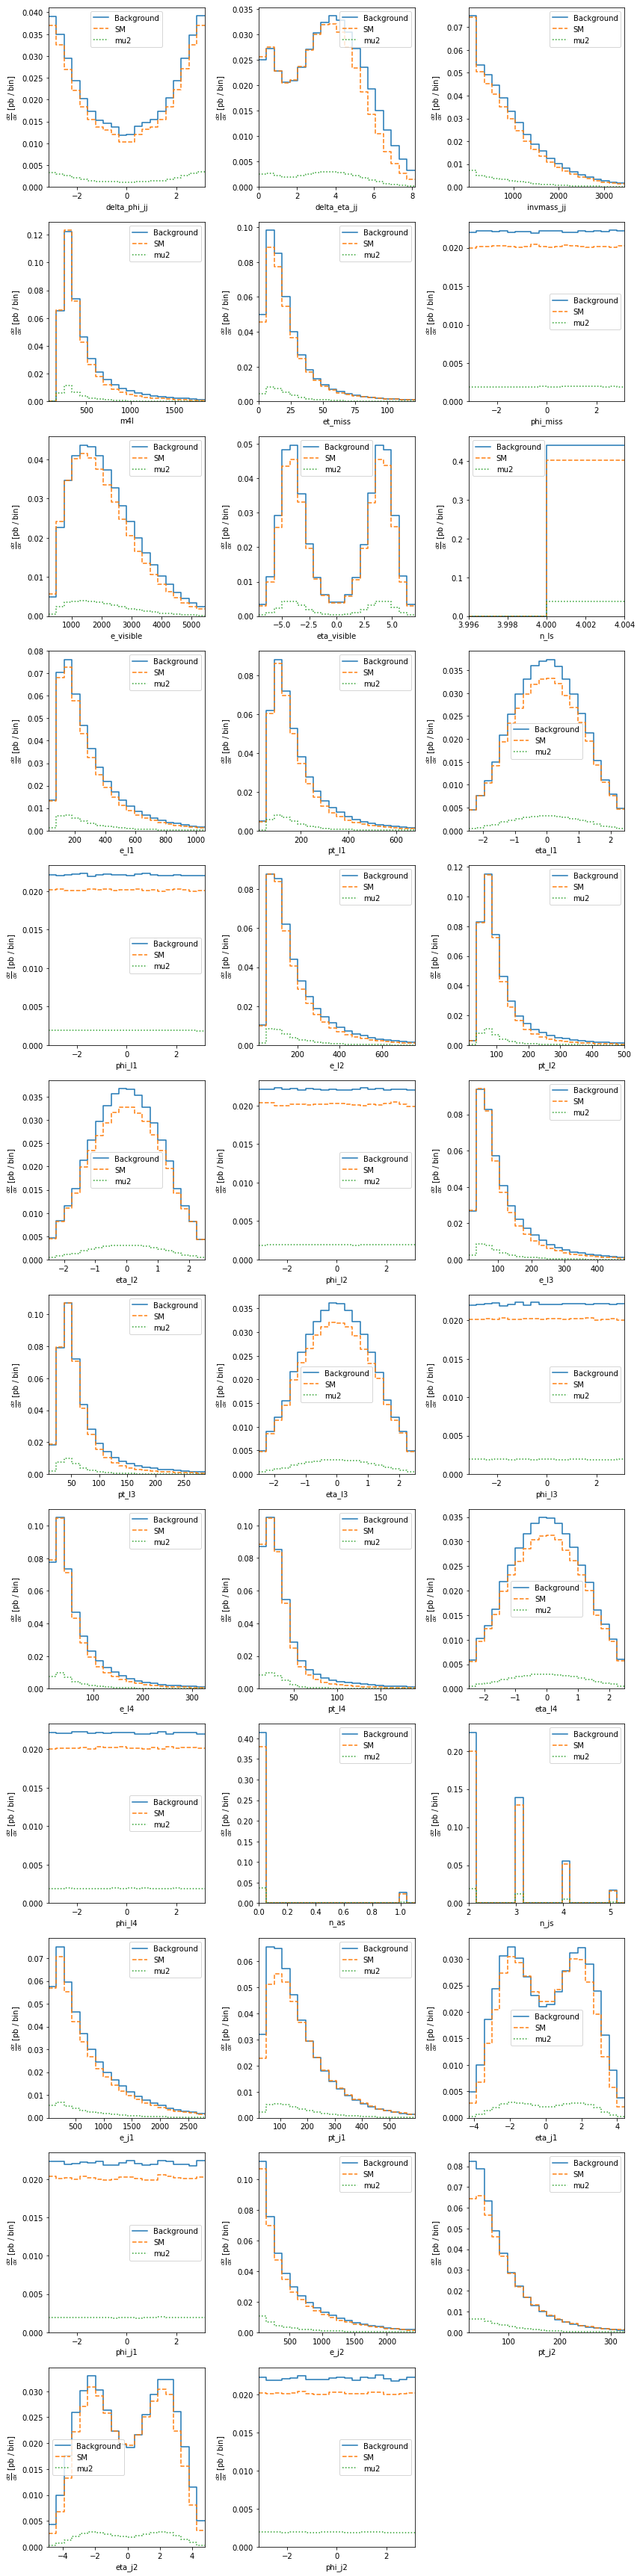

In [11]:
parameter_points = np.array([[0.], [1.], [2.]])**0.25
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=parameter_points,
    line_labels=['Background', 'SM', 'mu2'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)